### Distributive hypothesis in semantics

+ Ludwig Wittgenstein:
Die Bedeutung eines Wortes liegt in seinem Gebrauch.


+ Firth (1935:37) on context dependence (cited by Stubbs):
the complete meaning of a word is always contextual, and no study of meaning apart from context can be taken seriously.


+ Firth (1957:11):
You shall know a word by the company it keeps . . .


+ Harris (1954:34):
All elements in a language can be grouped into classes whose relative occurrence can be stated exactly. However, for the occurrence of a particular member of one class relative to a particular member of another class, it would be necessary to speak in terms of probability, based on the frequency of that occurrence in a sample.


+ Harris (1954:34):
It is possible to state the occurrence of any element relative to any other element, to the degree of exactness indicated above, so that distributional statements can cover all of the material of a language without requiring support from other types of information.


+ Harris (1954:34) (anticipating deep learning?):
The restrictions on relative occurrence of each element are described most simply by a network of interrelated statements, certain of them being put in terms of the results of certain others, rather than by a simple measure of the total restriction on each element separately.


+ Harris (1954:36) on levels of analysis:


    - Some question has been raised as to the reality of this structure. Does it really exist, or is it just a mathematical creation of the investigator’s? Skirting the philosophical difficulties of this problem, we should, in any case, realize that there are two quite different questions here. 
    
    - One: Does the structure really exist in language? The answer is yes, as much as any scientific structure really obtains in the data which it describes — the scientific structure states a network of relations, and these relations really hold in the data investigated.
    
    - Two: Does the structure really exist in speakers? Here we are faced with a question of fact which is not directly or fully investigated in the process of determining the distributional structure. Clearly, certain behaviors of the speakers indicate perception along the lines of the distributional structure, for example, the fact that while people imitate nonlinguistic or foreign-language sounds, they repeat utterances of their own language.


+ Harris (1954:39) on meaning and context-dependence:
All this is not to say that there is not a great interconnection between language and meaning, in whatever sense it may be possible to use this work. But it is not a one-to-one relation between morphological structure and anything else. There is not even a one-to-one relation between vocabulary and any independent classification of meaning; we cannot say that each morpheme or word has a single central meaning or even that it has a continuous or coherent range of meanings...The correlation between language and meaning is much greater when we consider connected discourse.


+ Harris (1954:43):
The fact that, for example, not every adjective occurs with every noun can be used as a measure of meaning difference. For it is not merely that different members of the one class have different selections of members of the other class with which they are actually found. More than that: if we consider words or morphemes A and B to be more different than A and C, then we will often find that the distributions of A and B are more different than the distributions of A and C. In other words, difference in meaning correlates with difference in distribution.


+ Turney & Pantel (2010:153):


    - Statistical semantics hypothesis: Statistical patterns of human word usage can be used to figure out what people mean (Weaver, 1955; Furnas et al., 1983). – If units of text have similar vectors in a text frequency matrix, then they tend to have similar meanings. (We take this to be a general hypothesis that subsumes the four more specific hypotheses that follow.)

    - Bag of words hypothesis: The frequencies of words in a document tend to indicate the relevance of the document to a query (Salton et al., 1975). – If documents and pseudo-documents (queries) have similar column vectors in a term–document matrix, then they tend to have similar meanings.

    - Distributional hypothesis: Words that occur in similar contexts tend to have similar meanings (Harris, 1954; Firth, 1957; Deerwester et al., 1990). – If words have similar row vectors in a word–context matrix, then they tend to have similar meanings.
      
    - Extended distributional hypothesis: Patterns that co-occur with similar pairs tend to have similar meanings (Lin & Pantel, 2001). – If patterns have similar column vectors in a pair–pattern matrix, then they tend to express similar semantic relations.

    - Latent relation hypothesis: Pairs of words that co-occur in similar patterns tend to have similar semantic relations (Turney et al., 2003). – If word pairs have similar row vectors in a pair–pattern matrix, then they tend to have similar semantic relations.
    
    
+ What is the meaning of the word "bardiwac" (Stefan Evert's example)?

    - He handed her her glass of bardiwac.

    - Beef dishes are made to complement the bardiwacs.

    - Nigel staggered to his feet, face flushed from too much bardiwac.

    - Malbec, one of the lesser-known bardiwac grapes, responds well to Australia’s sunshine.

    - I dined off bread and cheese and this excellent bardiwac.

    - The drinks were delicious: blood-red bardiwac as well as light, sweet Rhenish.

#### Word2Vec

One of the most famous distributional models is word2vec. The model is based on a neural network that predicts the probability of occurrence of a given word in a given context. The two seminal papers are linked below:

+ [Efficient Estimation of Word Representations inVector Space](https://arxiv.org/pdf/1301.3781.pdf)
+ [Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/abs/1310.4546)

The model produces word representations in a form of a vector, or, an embedding.

Word2Vec comprises two algorithms: Skip-Gram and Continuous Bag-Of-Words (CBOW). The CBOW architecture predicts the current word based on the context, and the Skip-gram predicts surrounding words given the current word.

#### How does word2vec work?

Word2Vec takes a corpus as an input and creates a vector for each word. Vectors (embeddings) are created based on the distributional hypothesis. Cosine similarity between embeddings reflects similarity in the semantics of the words.

We can use embeddings to create analogies:

+ king: man = queen: woman $\Rightarrow$
+ king - man + woman = queen

![w2v](https://cdn-images-1.medium.com/max/2600/1*sXNXYfAqfLUeiDXPCo130w.png)

More on the mechanics you can find [here](https://habr.com/ru/post/446530/)

#### Why do we need it?

+ to solve semantic problems
+ for which classes of words is the distributional hypothesis most useful?
+ some papers on its use in semantics:

* [Turney and Pantel 2010](https://jair.org/index.php/jair/article/view/10640)
* [Lenci 2018](https://www.annualreviews.org/doi/abs/10.1146/annurev-linguistics-030514-125254?journalCode=linguistics)
* [Smith 2019](https://arxiv.org/pdf/1902.06006.pdf)
* [Pennington et al. 2014](https://www.aclweb.org/anthology/D14-1162/)
* [Faruqui et al. 2015](https://www.aclweb.org/anthology/N15-1184/)

+ to create input for neural networks
+ word2vec is used in Siri, Google Assistant, Alexa, Google Translate...

#### Gensim

We will use the `gensim` library to get access to the word2vec model. Here you can find the library's [documentation](https://radimrehurek.com/gensim/models/word2vec.html).

First, let's install the library: `pip install gensim`. You can do it from jupyter: `!pip install gensim`.

In [1]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

#### How to train your own model

NB! The training does not involve preprocessing! It means that, if necessary for your task, you have to get rid of the punctuation, lower, lemmatize, do the pos tagging before the training.

To log the training:

In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

The input for the model is a text file, where every sentence starts on a new line. The text is stripped of the punctuation, lowered and lemmatized. We won't do the preprocessing part in class, we will use a preprocessed file liza_lem.txt.

In [4]:
f = 'liza_lem.txt'
data = gensim.models.word2vec.LineSentence(f)

We will be training our model now. The main parameters:

+ the data should be iterable
+ size — dimensionality of the word vectors,
+ window — maximum distance between the current and predicted word within a sentence,
+ min_count — ignores all words with total frequency lower than this,
+ sg —  training algorithm: 1 for skip-gram; otherwise CBOW,
+ sample — the threshold for configuring which higher-frequency words are randomly downsampled,
+ iter — number of iterations (epochs) over the corpus,
+ max_vocab_size — limits the RAM during vocabulary building; if there are more unique words than this, then prune the infrequent ones. Every 10 million word types need about 1GB of RAM. Set to None for no limit.

In [5]:
%time model_liza = gensim.models.Word2Vec(data, size=300, window=5, min_count=2)

2021-09-09 11:06:22,598 : INFO : collecting all words and their counts
2021-09-09 11:06:22,603 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-09 11:06:22,605 : INFO : collected 1189 word types from a corpus of 3043 raw words and 1 sentences
2021-09-09 11:06:22,608 : INFO : Loading a fresh vocabulary
2021-09-09 11:06:22,613 : INFO : effective_min_count=2 retains 463 unique words (38% of original 1189, drops 726)
2021-09-09 11:06:22,615 : INFO : effective_min_count=2 leaves 2317 word corpus (76% of original 3043, drops 726)
2021-09-09 11:06:22,620 : INFO : deleting the raw counts dictionary of 1189 items
2021-09-09 11:06:22,621 : INFO : sample=0.001 downsamples 82 most-common words
2021-09-09 11:06:22,625 : INFO : downsampling leaves estimated 1746 word corpus (75.4% of prior 2317)
2021-09-09 11:06:22,632 : INFO : estimated required memory for 463 words and 300 dimensions: 1342700 bytes
2021-09-09 11:06:22,633 : INFO : resetting layer weights
2021-09-0

CPU times: user 203 ms, sys: 11.7 ms, total: 215 ms
Wall time: 249 ms


We can normalize the vectors, then the model would take up less RAM. After this operation, however, you won't be able to retrain the model. L2-normalization is used: the sum of squares of all the vector elements will be brought to 1. 

In [6]:
model_liza.init_sims(replace=True)
model_path = "liza.bin"

print("Saving model...")
model_liza.wv.save_word2vec_format(model_path, binary=True)

2021-09-09 11:06:42,499 : INFO : precomputing L2-norms of word weight vectors
2021-09-09 11:06:42,513 : INFO : storing 463x300 projection weights into liza.bin


Saving model...


Let's count the number of words in the model:

In [7]:
print(len(model_liza.wv.vocab))

463


In [8]:
print(sorted([w for w in model_liza.wv.vocab]))

['ангел', 'анюта', 'армия', 'ах', 'барин', 'бедный', 'белый', 'берег', 'березовый', 'беречь', 'бесчисленный', 'благодарить', 'бледный', 'блеснуть', 'блестящий', 'близ', 'бог', 'богатый', 'большой', 'бояться', 'брать', 'бросать', 'бросаться', 'бывать', 'важный', 'ввечеру', 'вдова', 'велеть', 'великий', 'великолепный', 'верить', 'верно', 'весело', 'веселый', 'весна', 'вести', 'весь', 'весьма', 'ветвь', 'ветер', 'вечер', 'взглядывать', 'вздох', 'вздыхать', 'взор', 'взять', 'вид', 'видеть', 'видеться', 'видный', 'вместе', 'вода', 'возвращаться', 'воздух', 'война', 'воображать', 'воображение', 'воспоминание', 'восторг', 'восхищаться', 'время', 'вслед', 'вставать', 'встречаться', 'всякий', 'высокий', 'выть', 'выходить', 'глаз', 'глубокий', 'гнать', 'говорить', 'год', 'голос', 'гора', 'горе', 'горестный', 'горлица', 'город', 'горький', 'господин', 'гром', 'грусть', 'давать', 'давно', 'далее', 'дверь', 'движение', 'двор', 'девушка', 'дело', 'день', 'деньги', 'деревня', 'деревянный', 'десять', 

Let's see what the model learned:

In [9]:
model_liza.wv.most_similar(positive=["смерть", "любовь"], negative=["печальный"], topn=3)

[('хотеть', 0.25259149074554443),
 ('лиза', 0.23282110691070557),
 ('возвращаться', 0.22498047351837158)]

In [10]:
model_liza.wv.most_similar("любовь", topn=3)

[('лиза', 0.28875115513801575),
 ('свет', 0.27768391370773315),
 ('хотеть', 0.25997158885002136)]

In [11]:
model_liza.wv.similarity("лиза", "эраст")

0.3469555

In [12]:
model_liza.wv.similarity("лиза", "лиза")

1.0

In [13]:
model_liza.wv.doesnt_match("скорбь грусть слеза улыбка".split())

'слеза'

In [14]:
model_liza.wv.words_closer_than("лиза", "эраст")

['свой',
 'мочь',
 'который',
 'сказать',
 'ах',
 'весь',
 'любить',
 'человек',
 'день',
 'чистый']

#### Parameter variation

Note that what is said below works for large corpora, if your corpus is small, you need to be extra careful!

1) preprocessing -- do we lemmatize, tokenize, pos-tag or not

2) corpus size -- the greater, the better; but! for semantic tasks the quality is more important than quantity

3) vocabulary size

4) negative samples

5) the number of iterations

6) vector size -- 100-300 (it looks like >300 does not make the results better)

7) window size -- for syntax -- around 4, for semantics -- 8, 10.

A paper that discusses different parameter settings: https://www.aclweb.org/anthology/D14-1162.pdf

#### How to use a pre-trained model

#### RusVectōrēs

RusVectōrēs (https://rusvectores.org/ru/) provides a number of pre-trained models for Russian.

For other languages, look at [fastText](https://fasttext.cc/docs/en/english-vectors.html) and [GloVe](https://nlp.stanford.edu/projects/glove/)

Let's also look at some vector novels https://nevmenandr.github.io/novel2vec/

#### Working with a model

Word2vec models can have two formats:

+ .vec.gz — an ordinary file
+ .bin.gz — a binary file

To load a word2vec model, use `KeyedVectors`, you can set the `binary` parameter of the function `load_word2vec_format`.

Note that if the embeddings were created not by word2vec, you need to use `load`. Use it if you load the `glove`, `fasttext`, `bpe` embeddings.

Let's load a RusVectōrēs model for Russian, trained on Russian National Corpus 2015.

In [15]:
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

('ruscorpora_mystem_cbow_300_2_2015.bin.gz',
 <http.client.HTTPMessage at 0x7f3f16727c10>)

In [16]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

2021-09-09 11:10:47,492 : INFO : loading projection weights from ruscorpora_mystem_cbow_300_2_2015.bin.gz
2021-09-09 11:11:04,578 : INFO : loaded (281776, 300) matrix from ruscorpora_mystem_cbow_300_2_2015.bin.gz


In [17]:
words = ['хороший_A', 'плохой_A', 'ужасный_A','жуткий_A', 'страшный_A', 'красный_A', 'синий_A']

We need the POS tags, because the model was trained on lemmatized and tagged words. The name of the model specifies the algorythm that was used to tag the words, mystem, in our case.

Let's look at the 10 closest members for each word that we are interested in and at the cosine similarity.


In [18]:
for word in words:
    # is the word present in the model?
    if word in model:
        print(word)
        # looking at the first 10 numbers from the embedding 
        print(model[word][:10])
        # getting 10 neighbours
        for i in model.most_similar(positive=[word], topn=10):
            # word + cosine similarity
            print(i[0], i[1])
        print('\n')
    else:
        # Oops!
        print('Oops, the word "%s" is not in the model!' % word)

2021-09-09 11:11:04,602 : INFO : precomputing L2-norms of word weight vectors


хороший_A
[ 0.00722357 -0.00361956  0.1272455   0.06584469  0.00709477 -0.02014845
 -0.02056034  0.01321563  0.13692418 -0.09624264]
плохой_A 0.7463520765304565
неплохой_A 0.6708558797836304
отличный_A 0.6633436679840088
превосходный_A 0.6079519987106323
замечательный_A 0.586450457572937
недурной_A 0.5322482585906982
отменный_A 0.5168066024780273
прекрасный_A 0.4982393980026245
посредственный_A 0.49099433422088623
приличный_A 0.48622459173202515


плохой_A
[-0.05218472  0.0307817   0.1459371   0.0151835   0.06219714  0.01153753
 -0.01169093  0.01818374  0.0955373  -0.10191503]
хороший_A 0.7463520765304565
дурной_A 0.6186875104904175
скверный_A 0.6014161109924316
отличный_A 0.5226833820343018
посредственный_A 0.5061030983924866
неважный_A 0.5021152496337891
неплохой_A 0.49169060587882996
никудышный_A 0.48035892844200134
ухудшать_V 0.43680477142333984
плохо_ADV 0.4314875304698944


ужасный_A
[-0.05553271 -0.03172469  0.01998607  0.00171507 -0.00935555 -0.0296017
  0.05394973  0.01597532 

Cosine similarity for a pair of words:

In [19]:
print(model.similarity('плохой_A', 'хороший_A'))

0.74635214


In [20]:
print(model.similarity('плохой_A', 'синий_A'))

-0.12778337


In [21]:
print(model.similarity('ужасный_A', 'жуткий_A'))

0.69825286


Proportion:

+ positive — vectors that we add
+ negative — vectors that we subtract

In [22]:
print(model.most_similar(positive=['плохой_A', 'ужасный_A'], negative=['хороший_A'])[0][0])

страшный_A


Find the word that does not match the rest of the words:

In [23]:
print(model.doesnt_match('плохой_A хороший_A ужасный_A страшный_A'.split()))

хороший_A


In [25]:
print(model.doesnt_match('плохой_A ужасный_A страшный_A'.split()))

плохой_A


In [24]:
for word, score in model.most_similar(positive=['ужасно_ADV'], negative=['плохой_A']):
    print(f'{score:.4}\t{word}')

0.5575	безумно_ADV
0.4791	безмерно_ADV
0.4536	жутко_ADV
0.4472	невероятно_ADV
0.4394	очень_ADV
0.4364	чертовски_ADV
0.4231	страшно_ADV
0.4124	необычайно_ADV
0.4119	нестерпимо_ADV
0.4005	необыкновенно_ADV


#### Visualization of the data

Many ways to do it, let's try PCA (Principle Component Analysis, reduces the number of dimensions)

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
words = ['хороший_A', 'плохой_A', 'ужасный_A','жуткий_A', 'страшный_A', 'красный_A', 'синий_A']
X = model[words]

Executed on the list on words:

In [28]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

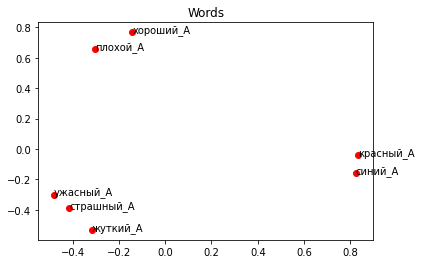

In [29]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

Executed on all the words in the model:

In [30]:
pca = PCA(n_components=2)
pca.fit(model[list(model.vocab)])
coords = pca.transform(model[words])

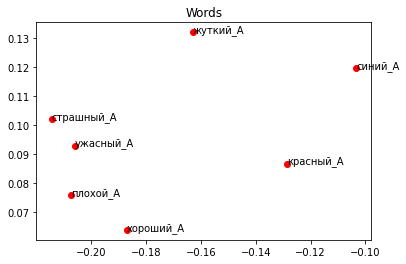

In [31]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

#### Model evaluation

+ word similarity, compare the results of the training with experimental results from human participants
+ analogies:

| слово 1    | слово 2    | отношение     | 
|------------|------------|---------------|
| Россия     | Москва     | страна-столица| 
| Норвегия   | Осло       | страна-столица|

In [ ]:
res = model.accuracy('ru_analogy_tagged.txt')

In [ ]:
for row in res[4]['incorrect'][:10]:
    print('\t'.join(row))